## Никонюк Марія КН-413, варіант №2

# Завдання 

Вибрати з інтернету два зображення з різною деталізацією об’єктів та два зображення з різним контрастом. Без використання жодних бібліотек для обробки зображень (наприклад Open CV), виконати відповідне завдання (номер завдання вказано у рейтинговій таблиці)

### Варіант 2

2. Виконати 2D лінійну фільтрацію зображення з різними значеннями ядра. Провести порівняльний аналіз

Сторонні бібліотеки для обробки зображень можна використовувати лише для виводу
зображень на екран.
Допускається використання таких мов: Python, C++, Java, C#, Matlab.

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_cv_img(output_1, output_2, kernel_size):

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    fig.suptitle('Kernel size = {}'.format(kernel_size))
    ax[0].imshow(cv2.cvtColor(output_1, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Output image 1')
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_2, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Output image 2')
    ax[1].axis('off')
    plt.show()

In [5]:
def my_filter2D(image, kernel):
    image = np.asarray(image, dtype=np.float)
    m, n = kernel.shape
    pad_h = m // 2
    pad_w = n // 2
    img_h = image.shape[0]
    img_w = image.shape[1]
    result = np.zeros_like(image)
    n_channels = image.shape[-1]

    for chan in range(n_channels):
        image_pad = np.pad(image[:,:,chan], ((pad_h, pad_h), (pad_w, pad_w)), 'constant')

        for i in range(pad_h, img_h + pad_h):
            for j in range(pad_w, img_w + pad_w):
                
                sub_img = image_pad[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
                result[i - pad_h, j - pad_w, chan] = np.sum(kernel * sub_img)
               
    result = np.round(result)            
    result[result > 255] = 255
    result[result < 0] = 0
    return np.uint8(result)

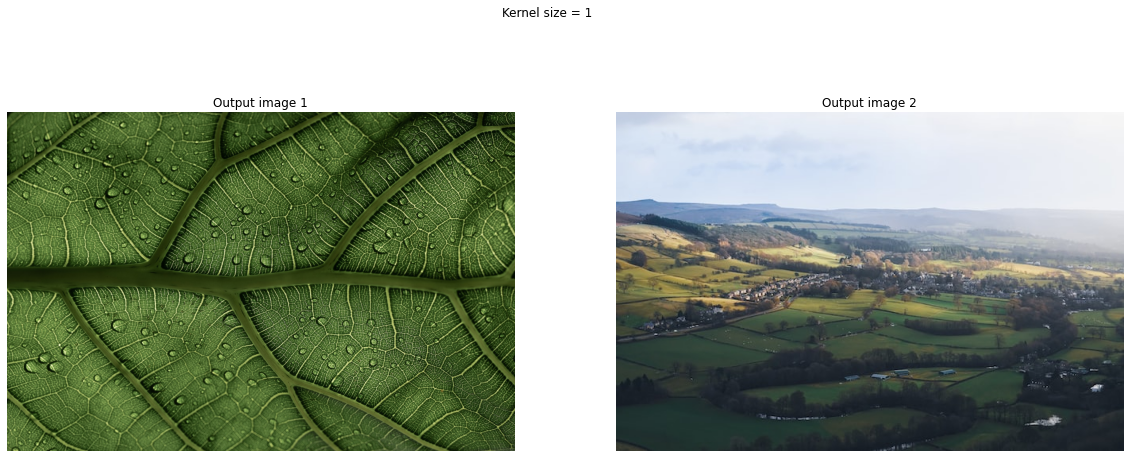

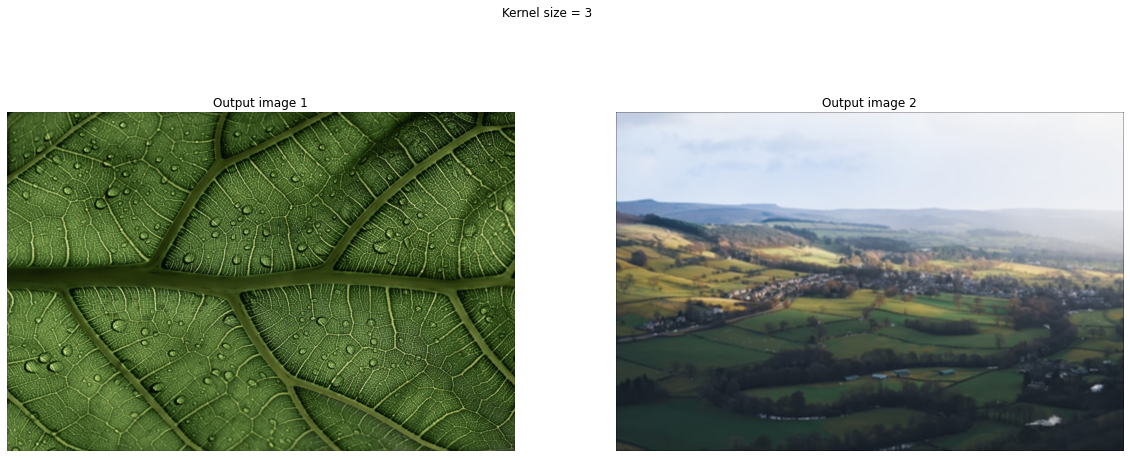

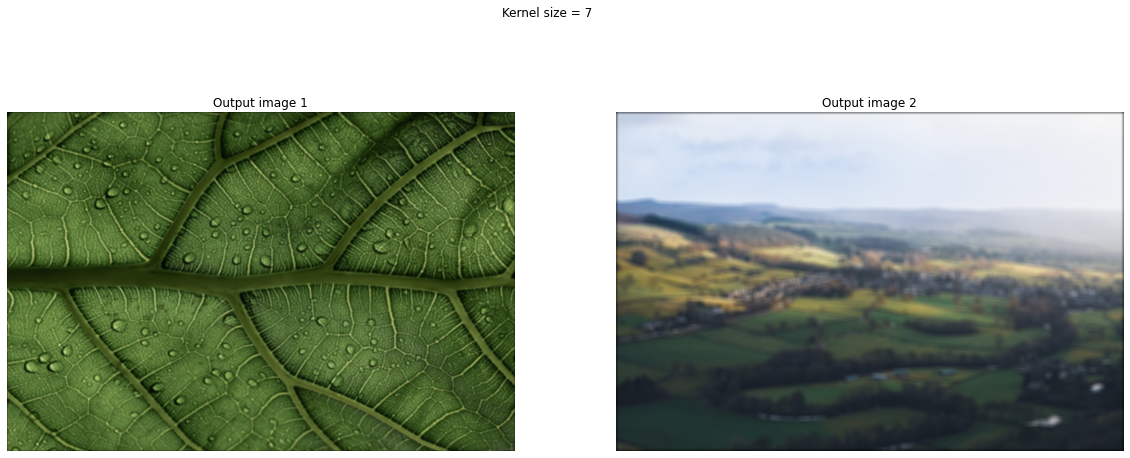

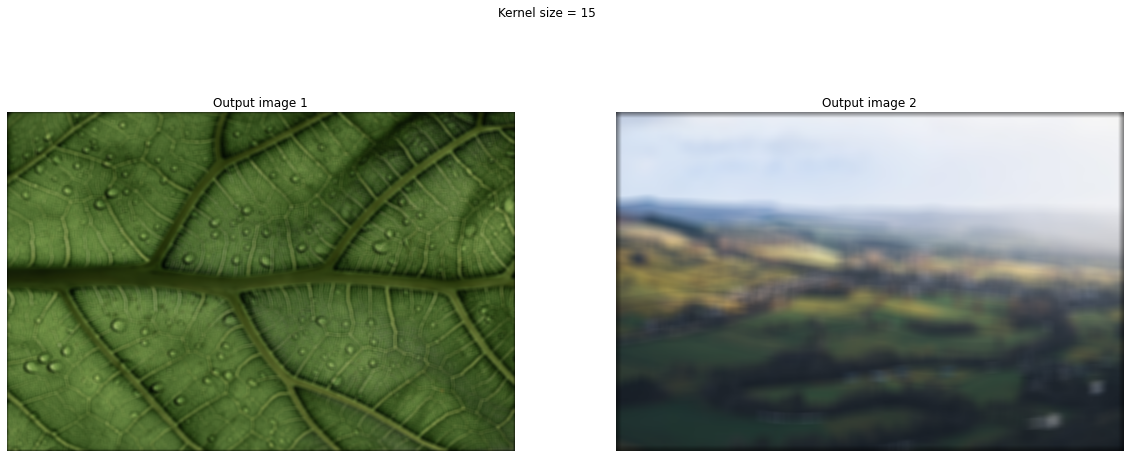

In [7]:
list_img_detailed = ['img1_detailed_high.jpg', 'img2_detailed_low.jpg']
img_1 = cv2.imread(list_img_detailed[0])
img_2 = cv2.imread(list_img_detailed[1])

kernel_sizes = [1, 3, 7, 15]
    
for kernel_size in kernel_sizes:
    
        kernel = np.ones((kernel_size,kernel_size),np.float32) / (kernel_size * kernel_size)
        
        output1_detailed = my_filter2D(img_1, kernel)
        
        output2_detailed = my_filter2D(img_2, kernel)
        

        plot_cv_img(output1_detailed, output2_detailed, kernel_size)


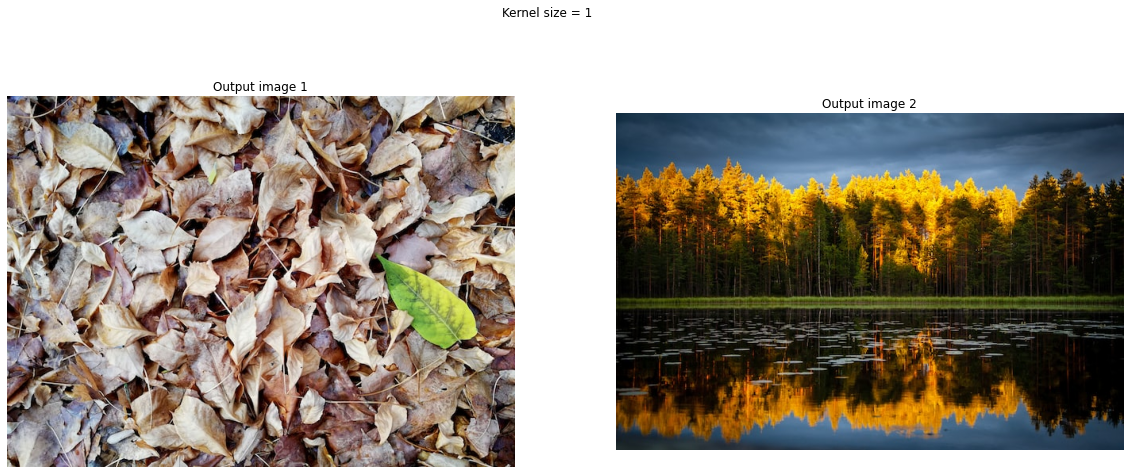

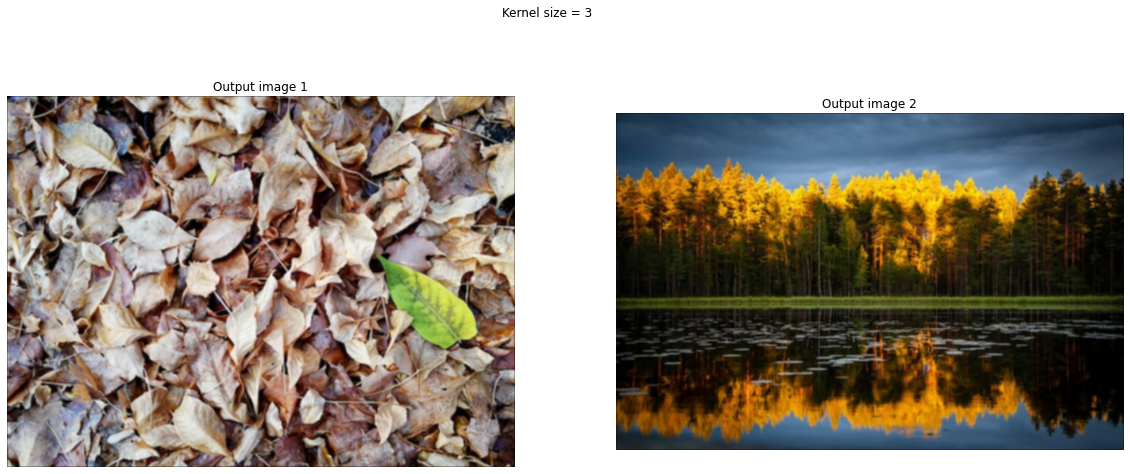

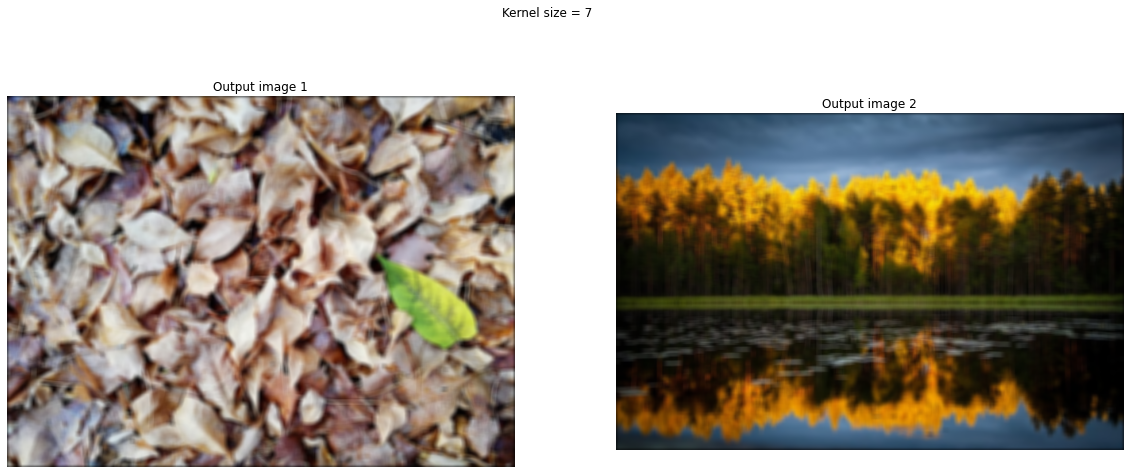

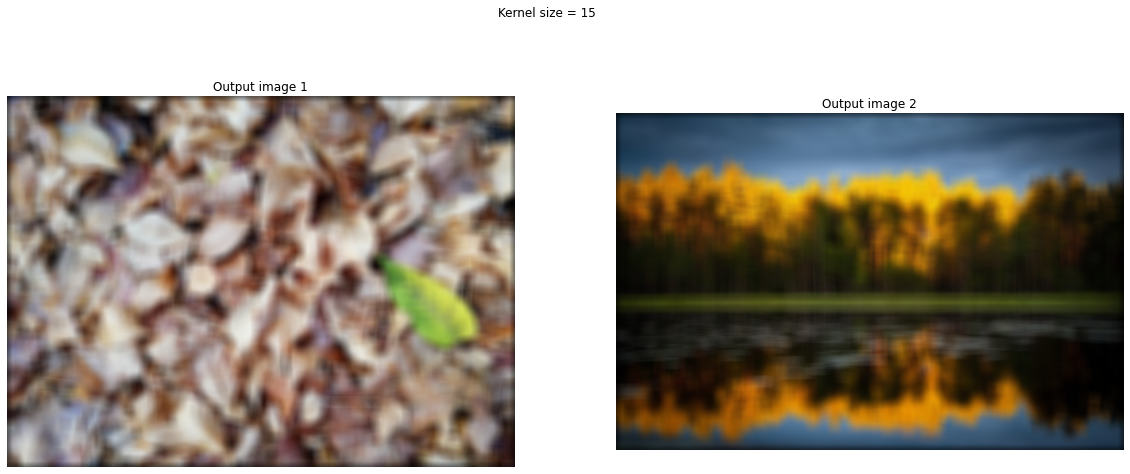

In [8]:
list_img_contrast = ['img3_contrast_low.jpg', 'img4_contrast_high.jpg']
img_1 = cv2.imread(list_img_contrast[0])
img_2 = cv2.imread(list_img_contrast[1])

kernel_sizes = [1, 3, 7, 15]
    
for kernel_size in kernel_sizes:
    
        kernel = np.ones((kernel_size,kernel_size),np.float32) / (kernel_size * kernel_size)
        
        output1_contrast = my_filter2D(img_1, kernel)
        
        output2_contrast = my_filter2D(img_2, kernel)
        

        plot_cv_img(output1_contrast, output2_contrast, kernel_size)
